In [1]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
"Petal Length", "Petal Width",
"Name"])
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


1.1.1 As we can see in the graph, in most sections, green dots are less spreaded out than red and blue ones. Green dots should be Iris-setosa, blue dots should be Iris-versicolor, red dots should be Iris-virginica.

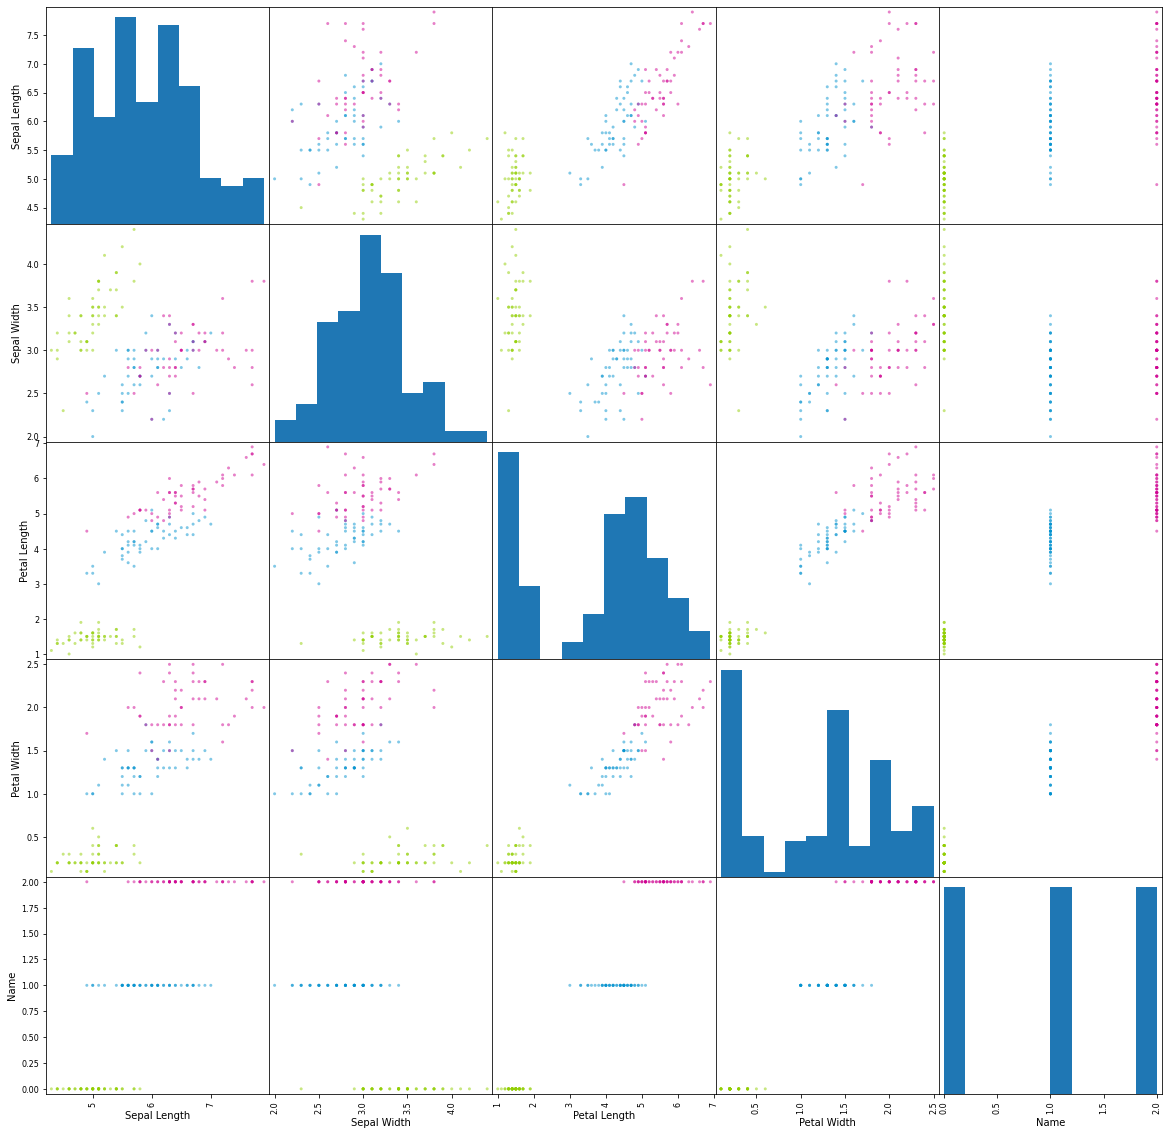

In [2]:
from pandas.plotting import scatter_matrix
df['Name'].unique()
df['Name'] = df['Name'].replace(['Iris-setosa'],0)
df['Name'] = df['Name'].replace(['Iris-versicolor'],1)
df['Name'] = df['Name'].replace(['Iris-virginica'],2)
color_wheel = {1: "#92cf03", 
               2: "#0392cf", 
               3: "#cf0392"}
colors = df["Name"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(df, color=colors, figsize=(20, 20), diagonal='hist')



In [3]:
nameDropped = df.drop(columns=['Name'])
nameDropped

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


1.1.2

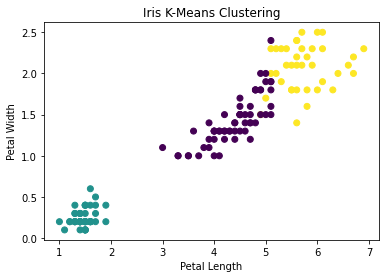

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

nameDropped = df.drop('Name',1)
nameDropped.shape
cluster = KMeans(n_clusters=3)
labels = cluster.fit_predict(nameDropped)
centers = cluster.cluster_centers_
pkmeans = pd.DataFrame(labels)
nameDropped.insert((nameDropped.shape[1]),'kmeans',pkmeans)
#print(labels)
#ax = scatter_matrix(labels, color=colors, figsize=(20, 20), diagonal='hist')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(nameDropped['Petal Length'],nameDropped['Petal Width'],
                     c=pkmeans[0])
ax.set_title('Iris K-Means Clustering')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
plt.show(scatter)


In [5]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

1.1.3
As We can see from the crosstab between cluster labels and name. We can see that for setosa, there are no instances belong to an incorrect cluster. For versicolor, there are 2 instances belong to an incorrect cluster, for virginica, there are 14 instances belong to an incorrect cluster.
Comparing to the cluster scatter plot, I think it matches with what we are seeing from the cross tabulation. With green dots are all clusterd by itself and there are no instances belong to an incorrect cluster, while a collision happened between purple and yellow dots while it seems that purple dots is the one which has 14 instances belong to an incorrect cluster.

In [6]:

dfWithName = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
"Petal Length", "Petal Width",
"Name"])
pd.crosstab(labels, dfWithName['Name'])

Name,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,0,48,14
1,50,0,0
2,0,2,36


1.2

In [7]:
from sklearn.feature_selection import mutual_info_regression
r1 = mutual_info_regression(df, dfWithName['Sepal Length'], random_state = 10)
r2 = mutual_info_regression(df, dfWithName['Sepal Width'], random_state = 10)
r3 = mutual_info_regression(df, dfWithName['Petal Length'], random_state = 10)
r4 = mutual_info_regression(df, dfWithName['Petal Width'], random_state = 10)
dfNew = pd.DataFrame(list(zip(r1, r2,r3,r4)), 
                index =['Sepal Length', 'Sepal Width', 'Petal Length','Petal Width', 'Name'],
               columns =['Sepal Length', 'Sepal Width', 'Petal Length','Petal Width']) 
dfNew

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,3.187048,0.293249,0.860601,0.643390
Sepal Width,0.292216,2.643410,0.314515,0.415290
Petal Length,0.889710,0.340373,3.181350,1.269664
Petal Width,0.644473,0.438078,1.239068,2.668961
Name,0.522508,0.290858,1.013623,1.028109


1.2.1

In [8]:
dfMIR = dfNew[:-1]
dfMIR

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,3.187048,0.293249,0.860601,0.643390
Sepal Width,0.292216,2.643410,0.314515,0.415290
Petal Length,0.889710,0.340373,3.181350,1.269664
Petal Width,0.644473,0.438078,1.239068,2.668961


In [9]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    children = model.children_
    dist = np.arange(children.shape[0])+1
    n_obs = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, dist, n_obs])
    dendrogram(linkage_matrix.astype(float), **kwargs)


In [10]:
from sklearn.cluster import AgglomerativeClustering

aggCluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
aggCluster.fit_predict(dfMIR)
print(cluster.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


1.2.2
As we can see the from the graph, Petal Width and Petal Length are the most similar to each other, and Sepal Width and Petal Width are the least similar to each other.

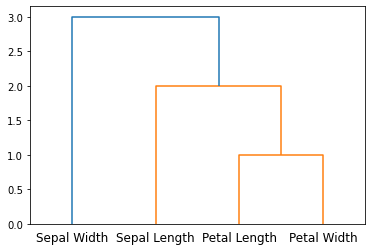

In [11]:
plot_dendrogram(aggCluster, labels = dfMIR.columns.values)